In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [59]:
import string

base_path = '/home/flok3n/develop/k8s_inc_analysis/eval/sched_time'
def save_fig(name: str, fig=None):
    if fig is None:
        fig = plt.gcf()
    fig.tight_layout(w_pad=3.5)
    fig.savefig(f'{base_path}/{name}.svg')

def annotate(axs):
    for n, ax in enumerate(axs):
        ax.text(-0.07, 1.05, f'{string.ascii_lowercase[n]}', transform=ax.transAxes, size=18, weight='bold')

In [3]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df['sched_name'] = df['sched_type'].apply(lambda x: 'in-network telemetry' if x == 'telemetry' else x)
    df = df.sort_values(by='sched_type')
    return df

In [4]:
df_all_feasible = preprocess(pd.read_csv('../data/sched_eval/all_scheds_time_eval/time_measurements.csv'))
df_20_feasbile = preprocess(pd.read_csv('../data/sched_eval/all_scheds_20proc_feasible/time_measurements.csv'))
df_half_feasible = preprocess(pd.read_csv('../data/sched_eval/all_scheds_half_feasible/time_measurements.csv'))
df_20_int_sw = preprocess(pd.read_csv('../data/sched_eval/telemetry_20_proc_int_switches/time_measurements.csv'))
df_80_int_sw = preprocess(pd.read_csv('../data/sched_eval/telemetry_80proc_int_switches/time_measurements.csv'))
# df_20_80_int_sw = preprocess(pd.read_csv('../data/sched_eval/telemetry_different_int_fractions_half_feasible_use_all_nodes/time_measurements.csv'))
no_memo_df = preprocess(pd.read_csv('../data/sched_eval/telemetry_no_memo_all_feasible_use_all_nodes/time_measurements.csv'))
no_memo20_df = preprocess(pd.read_csv('../data/sched_eval/telemetry_no_memo_20proc_feasible_use_all_nodes/time_measurements.csv'))
# df = preprocess(pd.read_csv('../data/sched_eval//time_measurements.csv'))
# df = pd.read_csv('../data/fat_tree2/time_measurements.csv')
# df['total_scheduling_time_ms'] /= 10
df_all_feasible.head()

,sched_type,cluster_key,k,num_nodes,num_inc_switches,num_graph_vertices,num_graph_edges,num_pods,total_scheduling_time_ms,sched_name
76,default,fat_tree_20,20,2000,123,2500,2499,10,70,default
72,default,fat_tree_18,18,1458,89,1863,1862,10,65,default
71,default,fat_tree_16,16,1024,83,1344,1343,10,67,default
70,default,fat_tree_16,16,1024,83,1344,1343,10,66,default
69,default,fat_tree_16,16,1024,83,1344,1343,10,69,default


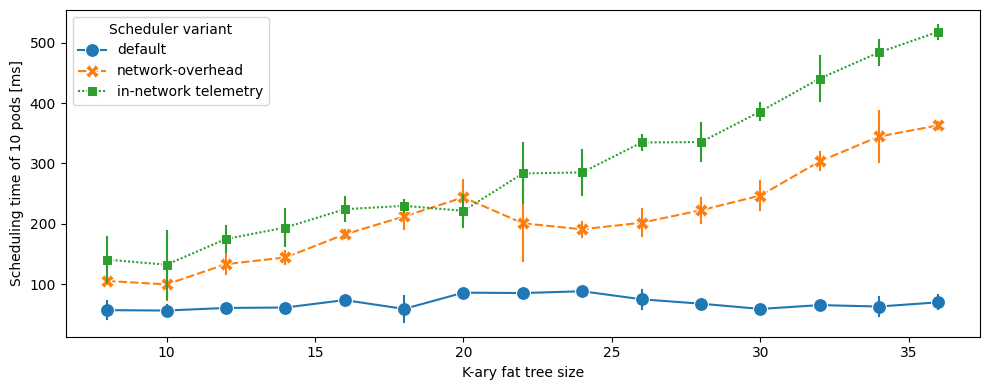

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.lineplot(data=df_half_feasible[df_half_feasible['k']>6], x='k', y='total_scheduling_time_ms', hue='sched_name', style='sched_name',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, legend=True, ax=ax)
ax.set_ylabel('Scheduling time of 10 pods [ms]')
ax.legend_.set_title("Scheduler variant")
ax.set_xlabel('K-ary fat tree size')
save_fig('all_scheds_half_feasible', fig)

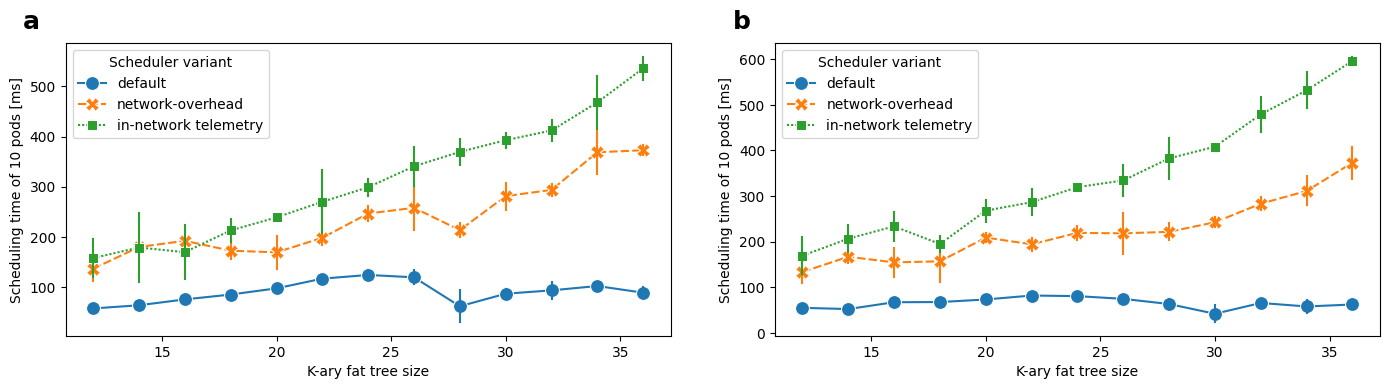

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# fig.tight_layout()
sns.lineplot(data=df_20_feasbile[df_20_feasbile['k'] > 10], x='k', y='total_scheduling_time_ms', hue='sched_name', style='sched_name',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, legend=True, ax=ax[0])
sns.lineplot(data=df_all_feasible[df_all_feasible['k']>10], x='k', y='total_scheduling_time_ms', hue='sched_name', style='sched_name',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, legend=True, ax=ax[1])
for a in ax:
    a.set_ylabel('Scheduling time of 10 pods [ms]')
    a.legend_.set_title("Scheduler variant")
    a.set_xlabel('K-ary fat tree size')
    # a.set_yticks(np.arange(0, 450, 50))
annotate(ax)
save_fig('all_scheds_varying_feasible', fig)

In [7]:
set(df_20_feasbile.columns).difference(set(df_half_feasible.columns))

set()

In [8]:
display(df_half_feasible[df_half_feasible['sched_type'] == 'telemetry'].iloc[0])
display(df_20_int_sw.iloc[0])

sched_type                             telemetry
cluster_key                          fat_tree_32
k                                             32
num_nodes                                   8192
feasible_node_fraction                       0.5
num_inc_switches                             271
num_graph_vertices                          9472
num_graph_edges                             9471
num_pods                                      10
total_scheduling_time_ms                     451
sched_name                  in-network telemetry
Name: 89, dtype: object

sched_type                             telemetry
cluster_key                           fat_tree_8
k                                              8
num_nodes                                    128
feasible_node_fraction                       0.5
num_inc_switches                               8
num_graph_vertices                           208
num_graph_edges                              207
num_pods                                      10
total_scheduling_time_ms                     164
sched_name                  in-network telemetry
Name: 0, dtype: object

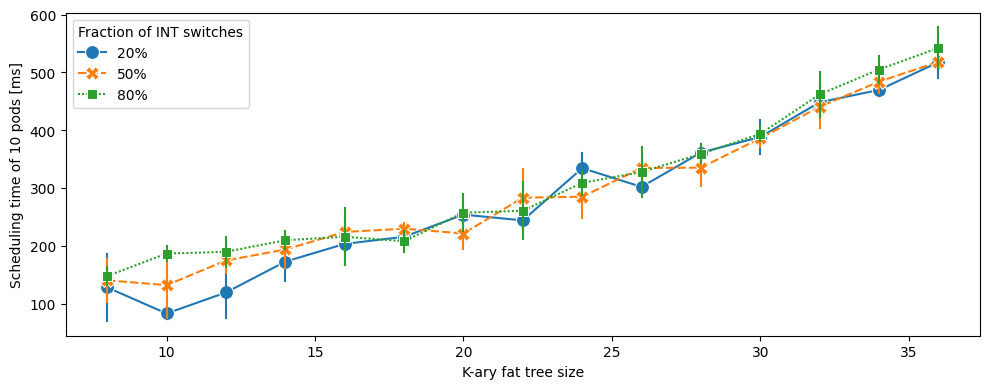

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# fig.tight_layout()
df = pd.concat([
    df_20_int_sw.assign(incsw='20%').drop(columns=['feasible_node_fraction']),
    df_half_feasible[df_half_feasible['sched_type'] == 'telemetry'].assign(incsw='50%'),
    df_80_int_sw.assign(incsw='80%').drop(columns=['feasible_node_fraction']),
])
sns.lineplot(data=df[df['k']>6], x='k', y='total_scheduling_time_ms', hue='incsw', style='incsw',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, legend=True, ax=ax)
ax.set_ylabel('Scheduling time of 10 pods [ms]')
ax.legend(title='Fraction of INT switches', alignment='left')
ax.set_xlabel('K-ary fat tree size')
save_fig('telemetry_sched_varying_intsw', fig)

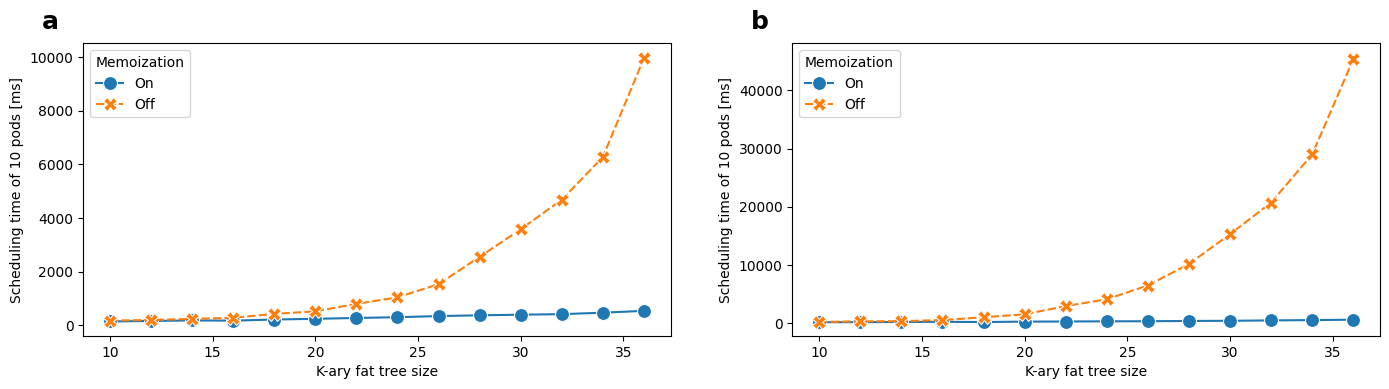

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

df = pd.concat([
    df_20_feasbile[df_20_feasbile['sched_type'] == 'telemetry'].assign(memo='On'),
    no_memo20_df.assign(memo='Off'),
])
sns.lineplot(data=df[df['k']>8], x='k', y='total_scheduling_time_ms', style='memo', hue='memo',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax[0], legend=True)

df = pd.concat([
    df_all_feasible[df_all_feasible['sched_type'] == 'telemetry'].assign(memo='On'),
    no_memo_df.assign(memo='Off')
])
sns.lineplot(data=df[df['k']>8], x='k', y='total_scheduling_time_ms', style='memo', hue='memo',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax[1], legend=True)
for a in ax:
    a.set_ylabel('Scheduling time of 10 pods [ms]')
    a.legend(title='Memoization', alignment='left')
    a.set_xlabel('K-ary fat tree size')
annotate(ax)
save_fig('telemetry_sched_memo', fig)

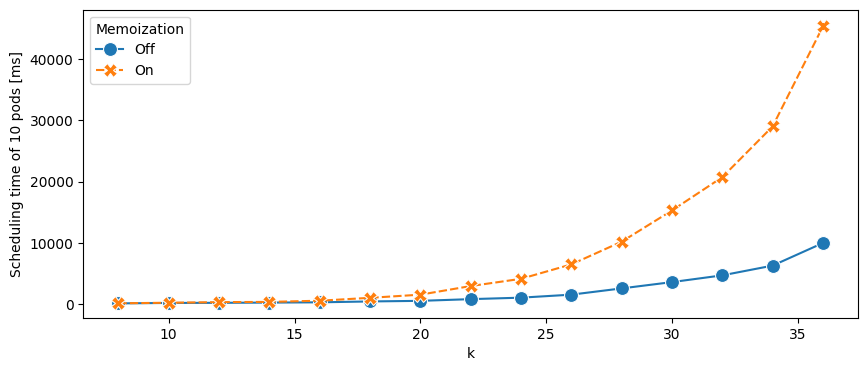

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
df = pd.concat([
    # df_all_feasible[df_all_feasible['sched_type'] == 'telemetry'].assign(memo='On'),
    no_memo20_df.assign(memo='Off'),
    no_memo_df.assign(memo='On')
])

sns.lineplot(data=df, x='k', y='total_scheduling_time_ms', style='memo', hue='memo',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, ax=ax, legend=True)
ax.set_ylabel('Scheduling time of 10 pods [ms]')
ax.legend(title='Memoization', alignment='left')

<Axes: xlabel='num_inc_switches', ylabel='total_scheduling_time_ms'>

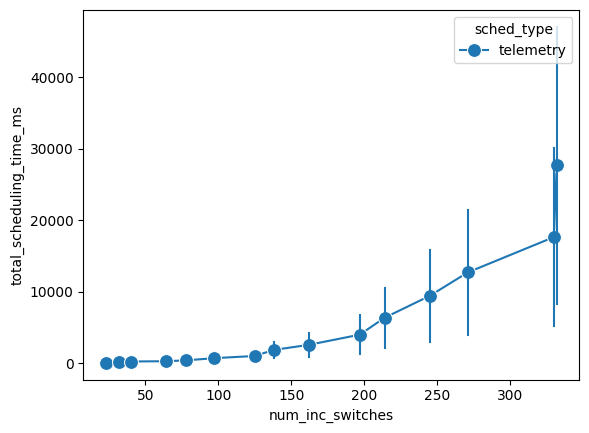

In [12]:

sns.lineplot(data=df, x='num_inc_switches', y='total_scheduling_time_ms',hue='sched_type', style='sched_type',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, legend=True)

<Axes: xlabel='num_nodes', ylabel='total_scheduling_time_ms'>

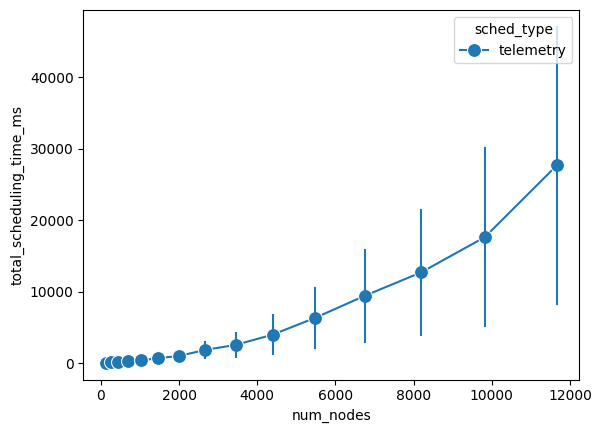

In [13]:
sns.lineplot(data=df, x='num_nodes', y='total_scheduling_time_ms',hue='sched_type', style='sched_type',
             err_style='bars', errorbar=("sd", 1), markers=True, markersize=10, legend=True)